# Exercise 8

## Car Price Prediction

Predict if the price of a car is low or high

In [577]:
data = pd.read_csv(r'C:\Users\alexh\OneDrive\Documents\GitHub\AdvancedMethodsDataAnalysisClass\datasets\dataTrain_carListings.zip')
data.head(10)

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler
5,37944,2017,5362,FL,Jeep,Wrangler
6,18995,2010,69431,NH,Ford,F-1504WD
7,28000,2015,35090,WI,Ford,ExplorerXLT
8,10995,2012,35100,NY,Hyundai,Sonata4dr
9,32991,2017,14238,TX,Kia,SorentoSX


In [578]:
%matplotlib inline
import pandas as pd

data = pd.read_csv(r'C:\Users\alexh\OneDrive\Documents\GitHub\AdvancedMethodsDataAnalysisClass\datasets\dataTrain_carListings.zip')
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int)
data = data.drop(['Model', 'Price'], axis=1)

data.head(10)

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice
15,2016,29242,0,0,0,0,1,0,0,1
47,2015,26465,0,0,0,0,1,0,0,1
85,2012,46739,0,1,0,0,0,0,0,1
141,2017,41722,0,0,0,0,0,1,0,1
226,2014,77669,0,0,0,0,0,0,1,0
244,2017,18963,0,0,0,0,0,0,1,1
258,2017,15063,0,0,0,0,1,0,0,1
333,2014,46001,0,0,0,0,1,0,0,0
366,2015,26609,0,0,0,0,0,1,0,1
452,2012,87621,0,1,0,0,0,0,0,0


In [579]:
data.head(10)

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice
15,2016,29242,0,0,0,0,1,0,0,1
47,2015,26465,0,0,0,0,1,0,0,1
85,2012,46739,0,1,0,0,0,0,0,1
141,2017,41722,0,0,0,0,0,1,0,1
226,2014,77669,0,0,0,0,0,0,1,0
244,2017,18963,0,0,0,0,0,0,1,1
258,2017,15063,0,0,0,0,1,0,0,1
333,2014,46001,0,0,0,0,1,0,0,0
366,2015,26609,0,0,0,0,0,1,0,1
452,2012,87621,0,1,0,0,0,0,0,0


In [580]:
data.shape

(13150, 10)

In [581]:
y = data['HighPrice']
X = data.drop(['HighPrice'], axis=1)

In [582]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Exercise 8.1

Estimate a Decision Tree Classifier Manually using the code created in the Notebook #4

Evaluate the accuracy on the testing set

In [583]:
#Import libraries
import pandas as pd
import numpy as np
#remove rows with missing values
data.dropna(inplace = True)
data.head(10)

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice
15,2016,29242,0,0,0,0,1,0,0,1
47,2015,26465,0,0,0,0,1,0,0,1
85,2012,46739,0,1,0,0,0,0,0,1
141,2017,41722,0,0,0,0,0,1,0,1
226,2014,77669,0,0,0,0,0,0,1,0
244,2017,18963,0,0,0,0,0,0,1,1
258,2017,15063,0,0,0,0,1,0,0,1
333,2014,46001,0,0,0,0,1,0,0,0
366,2015,26609,0,0,0,0,0,1,0,1
452,2012,87621,0,1,0,0,0,0,0,0


In [584]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [585]:
# Definición de las variables que se usarán para pronosticar si el vehículo es costoso o no:
feature_cols = data.columns.drop('HighPrice')
feature_cols

Index(['Year', 'Mileage', 'M_Camry', 'M_Camry4dr', 'M_CamryBase', 'M_CamryL',
       'M_CamryLE', 'M_CamrySE', 'M_CamryXLE'],
      dtype='object')

In [586]:
# De definen las variables X y Y:
X = data[feature_cols]
y = data.HighPrice

In [587]:
X.columns

Index(['Year', 'Mileage', 'M_Camry', 'M_Camry4dr', 'M_CamryBase', 'M_CamryL',
       'M_CamryLE', 'M_CamrySE', 'M_CamryXLE'],
      dtype='object')

In [588]:
#Defino las cuatro variables para construir el árbol de decisión:
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [589]:
#Se toma cada variable, en este caso se hace con la variable número 1. En este caso, se hará con la variable 1 (Mileage)
#, y se partirá en 10 percentiles
j = 1
print(X.columns[j])

Mileage


In [590]:
# Se divide la variable en la cantidad especificada en num_ctp
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())

In [591]:
splits = np.unique(splits)
splits

array([5.00000e+00, 1.58728e+04, 2.32508e+04, 2.98747e+04, 3.56432e+04,
       4.16580e+04, 4.83404e+04, 6.16152e+04, 8.07292e+04, 1.06371e+05])

In [592]:
# Se divide la base en 4
k = 4

In [593]:
filter_l = X.iloc[:, j] < splits[k]

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [594]:
#Gini
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [595]:
gini_l = gini(y_l)
gini_l

0.16054959591724627

In [596]:
gini_r = gini(y_r)
gini_r

0.45962735393665444

In [597]:
def gini_impurity(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [598]:
gini_impurity(X.iloc[:, j], y, splits[k])

0.1473493405041757

In [599]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [600]:
j, split, gain = best_split(X, y, 4)
j, split, gain

(0, 2014.0, 0.23223870086324505)

In [601]:
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [602]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(13150, 4169, 8981)

In [603]:
y.mean(), y_l.mean(), y_r.mean()

(0.5795437262357415, 0.07939553849844087, 0.8117136176372342)

In [604]:
def tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X_train, y_train, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y_train.mean() >= 0.5) 
    y_prob = (y_train.sum() + 1.0) / (y_train.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y_train.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y_train.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [605]:
tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 0.5780753517930095,
 'level': 0,
 'split': [1, 52187.63636363637],
 'n_samples': 13150,
 'gain': 0.23872134898880762,
 'sl': {'y_pred': 1,
  'y_prob': 0.8391583452211127,
  'level': 1,
  'split': -1,
  'n_samples': 13150,
  'gain': 0.03317687167496233},
 'sr': {'y_pred': 0,
  'y_prob': 0.12133499688084841,
  'level': 1,
  'split': -1,
  'n_samples': 13150,
  'gain': 0.04366470703709979}}

In [606]:
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=10)

In [607]:
tree

{'y_pred': 1,
 'y_prob': 0.5780753517930095,
 'level': 0,
 'split': [1, 52187.63636363637],
 'n_samples': 13150,
 'gain': 0.23872134898880762,
 'sl': {'y_pred': 1,
  'y_prob': 0.8391583452211127,
  'level': 1,
  'split': [0, 2014.0],
  'n_samples': 13150,
  'gain': 0.03317687167496233,
  'sl': {'y_pred': 0,
   'y_prob': 0.36828644501278773,
   'level': 2,
   'split': [0, 2012.0],
   'n_samples': 13150,
   'gain': 0.05908490521197157,
   'sl': {'y_pred': 0,
    'y_prob': 0.08,
    'level': 3,
    'split': -1,
    'n_samples': 13150,
    'gain': 0.01707452211653898},
   'sr': {'y_pred': 0,
    'y_prob': 0.46757679180887374,
    'level': 3,
    'split': -1,
    'n_samples': 13150,
    'gain': 0.0288082580453648}},
  'sr': {'y_pred': 1,
   'y_prob': 0.8743054224947308,
   'level': 2,
   'split': [0, 2015.0],
   'n_samples': 13150,
   'gain': 0.014933378976312917,
   'sl': {'y_pred': 1,
    'y_prob': 0.7348484848484849,
    'level': 3,
    'split': -1,
    'n_samples': 13150,
    'gain': 0.

In [608]:
# Forecast
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted    

In [609]:
y_pred1 = tree_predict(X_test, tree)

In [610]:
# Evaluación del accuracy:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1, normalize=True)

0.8672811059907835

Con la separación de 10 percentiles y un k = 4, podemos notar que el accuracy de la evaluación del árbol es de 0.86, lo cual es viable para la predicción para clasificar si un vehículo tiene un alto o un bajo costo.

# Exercise 8.2

Estimate a Bagging of 10 Decision Tree Classifiers Manually using the code created in the Notebook #5

Evaluate the accuracy on the testing set

In [612]:
import pandas as pd
import numpy as np
import multiprocessing

In [613]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [614]:
n_estimators = 10
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [615]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=1, num_pct=10)
    #trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [616]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = tree_predict(X_test, trees[i])

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9
332784,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
146436,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
130476,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
85618,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [617]:
y_pred_df.sum(axis=1)[:10]

332784    10.0
146436    10.0
130476    10.0
85618     10.0
75474      0.0
330419     0.0
205915    10.0
2836       0.0
250833    10.0
126784     0.0
dtype: float64

In [618]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_pred, y_test)

0.8709193245778611

In [619]:
metrics.accuracy_score(y_pred, y_test)

0.8414746543778802

# Exercise 8.3

Implement the variable max_features on the Decision Tree Classifier created in 11.1.

Compare the impact in the results by varing the parameter max_features

Evaluate the accuracy on the testing set

In [620]:

def best_split_max(X, y, max_features, num_pct=10):
    
    np.random.seed(1)
    
    nums = range(X.shape[1])
    features = np.random.choice(a=nums, size=max_features, replace=False)
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [621]:
def tree_grow_max(X, y, max_features, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split_max(X, y, max_features, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [622]:
tree_max = tree_grow_max(X_train, y_train, max_features= 3, level=0, min_gain=0.001, max_depth=10, num_pct=10)

In [623]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted    

In [624]:
predictions_max = tree_predict(X_test, tree_max, proba=False)

In [625]:
y_true = y_test
y_pred = predictions_max

accuracy_score(y_true, y_pred)

0.8707373271889401

# Exercise 8.4

Estimate a Bagging of 10 Decision Tree Classifiers with `max_features = log(n_features)`

Evaluate the accuracy on the testing set

In [626]:
import math

In [627]:
n_f = 10000
max_features = round(math.log(n_f)) #Revisar la formulación del logaritmo. Corre, pero estar seguros del valor obtenido

In [628]:
tree_max_log = tree_grow_max(X_train, y_train, max_features= max_features, level=0, min_gain=0.001, max_depth=10, num_pct=10)

In [629]:
predictions_log = tree_predict(X_test, tree_max_log, proba=False)

In [630]:
y_true = y_test
y_pred = predictions_log

accuracy_score(y_true, y_pred)

0.876036866359447

# Exercise 8.5

Using sklearn, train a RandomForestClassifier

Evaluate the accuracy on the testing set

In [631]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [632]:
pred_fit = pd.Series(cross_val_score(clf, X_train, y_train, cv=10)).describe()

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [633]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [634]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8389400921658986


# Exercise 8.6

Find the best parameters of the RandomForestClassifier (max_depth, max_features, n_estimators)

Evaluate the accuracy on the testing set

In [635]:
# Tuning max_features:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=200, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

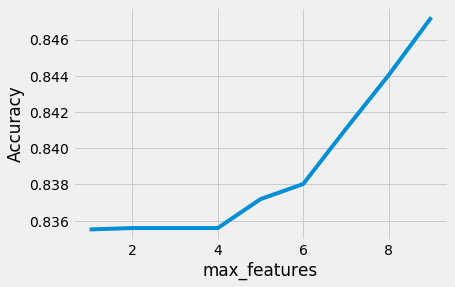

In [636]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

De acuerdo con la gráfica anterior, podemos decir que entre más variables tomo en cuenta para la evaluación de los árboles de decisión, tendremos un índice de accuracy mayor. En este caso, lo más recomendable es tomar todas las variables de la base de datos, lo que se podría decir que el proceso de evaluación sería muy similar al de bagging.

In [638]:
# N_estimators:
# list of values to try for n_estimators
estimator_range = range(10, 400, 5)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

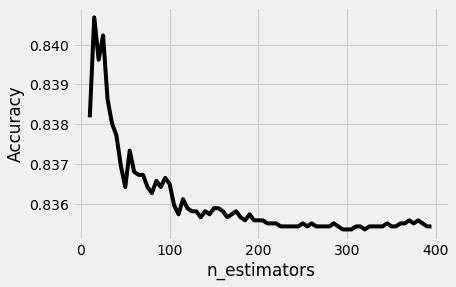

In [639]:
plt.plot(estimator_range, accuracy_scores, 'k')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

De acuerdo con la gráfica anterior, podemos ver el comportamiento del random forest cuando el número de árboles va de 5 en 5 hasta 400. Se puede decir que el número de árboles ideal sería de aproximadamente 10 árnoles para tener el accuracy más óptimo.

# Exercise 8.7 

Using xgboost train a XGBClassifier 

Evaluate the accuracy on the testing set

In [641]:
from xgboost import XGBClassifier
from sklearn import metrics

clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [642]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

(0.8989412897016361, 0.8790322580645161)

# Exercise 8.8

Using xgboost train a XGBClassifier 

Modify the parameters learning rate, gamma, colsample_bytree. Explain what each parameter means.

Evaluate the accuracy on the testing set

In [649]:
clf1 = XGBClassifier(learning_rate = 0.4, gamma = 7, colsample_bytree = 0.7)
clf1

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7, gamma=7, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.4, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

Las definiciones de los parámetros son los siguientes:
#### Learning Rate: 
Es una contracción para evitar el sobre-ajuste. Luego de cada boosting generado en el modelo, podemos obtener los pesos de nuevas características y eta contrae los pesos de las características con el fin de que el proceso de boosting sea más conservador. el rango de aplicación debe ser entre 0 y 1. 
    
#### Gamma: 
Es la reducción mínima de pérdida requerida para hacer una mayor partición en un nodo del árbol. Entre más grande es Gamma, más conservador será el algoritmo. El rango de aplicación es desde cero.
    
#### Colsample_bytree:
Es porción de submuestra de columnas cuando cuando se construye cada árbol. Las submuestras ocurren una vez por cada árbol construido.

In [654]:
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

(0.901386748844376, 0.8820276497695853)

#### Conclusión:
Luego de la evaluación de diferentes modelos para la predicción de clasificación para saber si un vehículo es caro o no, podemos concluir que el predictor que tuvo el mejor rendimiento en cuanto al F1 Score y el Accuracy fue el XGB Classifier con sus parámetros alterados como Learning Rate, Gamma y el Colsample By Tree, los cuales podemos ver que hacen que los indices de precisión incluso sean mayores comparado con el XGB Classifier implementado sin alguna modificación de sus parámetros.